# Imports

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import os
import sys
import time
import logging
import traceback
import pandas as pd
import glob2 as glob
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from typing import Optional
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [3]:
BASE_DIR = Path.cwd()

In [4]:
# Helper 
from src.Helper.merger import MERGER
from src.Helper.filters import ApplyPreProccessingTask, AnErrorOccured

# Data Pre-Processing
from src.DataPreProcessing.DataCleaning import CLEANER
from src.DataPreProcessing.DataHandleMissingValues import HandleMissingValues
from src.DataPreProcessing.DataEncodingCategoricalVariables import EncodingCategorical
from src.DataPreProcessing.DataFeatureScaling import FeatureScaler
from src.DataPreProcessing.DataFeatureEngineering import FeatureEngineering
from src.DataPreProcessing.BalancingDataset import DatasetBalancer
from src.DataPreProcessing.DataHandlingOutlier import OutlierDetector
from src.DataPreProcessing.DataFeatureSelection import FeatureSelector

# Exploratory Data Analysis(EDA)
from src.EDA.eda import EDA

# Hypothesis Tests
from src.HypothesisTesting.HypothesisTests import HypothesisTests
from src.HypothesisTesting.ValidateTests import ValidateHypothesisTesting

# Train & Testing
from src.Training.scale import Scale
from src.Training.helper import TrainModel, TestModel
from src.Training.compare import CompareModelPerformance, preprocess_data

# Intial Set-Up

In [5]:
# Set up logger
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# Clear existing handlers
logger.handlers = []

# File handler
file_handler = logging.FileHandler("logs.txt")
file_handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

# Console handler
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)
console_handler.setFormatter(formatter)
logger.addHandler(console_handler)

# Disable propagation to avoid duplicate logs from parent loggers
logger.propagate = False

In [6]:
info = f"Searching for all csv files in Raw foler."
logger.info(info)
raw_csv_files = glob.glob("./src/Data/Raw/*.csv")

for index, file in enumerate(raw_csv_files):
    info = f"RAW FILE {str(index + 1).zfill(2)} {file}"
    logger.info(info)

2024-12-13 12:02:05,483 - __main__ - INFO - Searching for all csv files in Raw foler.
2024-12-13 12:02:05,484 - __main__ - INFO - RAW FILE 01 ./src/Data/Raw/heart_01.csv
2024-12-13 12:02:05,484 - __main__ - INFO - RAW FILE 02 ./src/Data/Raw/heart_02.csv
2024-12-13 12:02:05,484 - __main__ - INFO - RAW FILE 03 ./src/Data/Raw/heart_03.csv
2024-12-13 12:02:05,485 - __main__ - INFO - RAW FILE 04 ./src/Data/Raw/heart_04.csv


In [7]:
info = f"Loading all csv files."
logger.info(info)
merger = MERGER(logger=logger)

for index, file in enumerate(raw_csv_files):
    info = f"Loading file {file} to merger."
    logger.info(info)
    response = merger.load_csv_file(file)
    
    if response["success"]:
        info = f"File {file} to loaded successfully in MERGER."
        logger.info(info)
    else:
        info = f"Unable to load File-{file} in MERGER. Skipping..."
        logger.warning(info)

output_file = os.path.join(BASE_DIR, "src/Data/Merged/merged.csv")
info = f"Saving file to {output_file}"
logger.info(info)
response = merger.save_merged_data(output_file=output_file)

file = output_file

2024-12-13 12:02:05,496 - __main__ - INFO - Loading all csv files.
2024-12-13 12:02:05,497 - __main__ - INFO - Loading file ./src/Data/Raw/heart_01.csv to merger.
2024-12-13 12:02:05,499 - __main__ - INFO - [MERGER] Successfully loaded file: ./src/Data/Raw/heart_01.csv
2024-12-13 12:02:05,500 - __main__ - INFO - File ./src/Data/Raw/heart_01.csv to loaded successfully in MERGER.
2024-12-13 12:02:05,500 - __main__ - INFO - Loading file ./src/Data/Raw/heart_02.csv to merger.
2024-12-13 12:02:05,504 - __main__ - INFO - [MERGER] Successfully loaded file: ./src/Data/Raw/heart_02.csv
2024-12-13 12:02:05,504 - __main__ - INFO - File ./src/Data/Raw/heart_02.csv to loaded successfully in MERGER.
2024-12-13 12:02:05,504 - __main__ - INFO - Loading file ./src/Data/Raw/heart_03.csv to merger.
2024-12-13 12:02:05,506 - __main__ - INFO - [MERGER] Successfully loaded file: ./src/Data/Raw/heart_03.csv
2024-12-13 12:02:05,506 - __main__ - INFO - File ./src/Data/Raw/heart_03.csv to loaded successfully in

# Data Pre-Processing

## Cleaning

In [8]:
# Apply CLEANER
output_file = os.path.join(BASE_DIR, "src/Data/Cleaned/cleaned.csv")

ApplyPreProccessingTask(
    task = "Cleaning", 
    task_class = CLEANER, 
    sub_func = "clean_data", 
    sub_func_args = None, 
    input_file = file, 
    output_file = output_file, 
    logger = logger
)

file = output_file

2024-12-13 12:02:05,592 - __main__ - INFO - Applying Cleaning to data.
2024-12-13 12:02:05,592 - __main__ - INFO - Creating Cleaning...
2024-12-13 12:02:05,592 - __main__ - INFO - Loading data...
INFO:src.Helper.dataloader:[CLEANER] Data loaded successfully from /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Data/Merged/merged.csv
2024-12-13 12:02:05,608 - __main__ - INFO - Data loaded successfully.
2024-12-13 12:02:05,609 - __main__ - INFO - Starting prcossing data...
2024-12-13 12:02:05,609 - __main__ - INFO - Starting data cleaning process...
2024-12-13 12:02:05,657 - __main__ - INFO - [CLEANER] Found missing values:
sex        918
cp         918
restecg    918
exang      918
slope      918
ca         918
thal       918
dtype: int64
/mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/DataPreProcessing/DataCleaning.py:89: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using 

[CLEANER] Starting data cleaning process...
[CLEANER] Found missing values:
sex        918
cp         918
restecg    918
exang      918
slope      918
ca         918
thal       918
dtype: int64
[CLEANER] Found 13 invalid values in oldpeak
[CLEANER] Data cleaning completed. Final shape: (27246, 14)


## Handling Missing Values

In [9]:
# Apply HandleMissingValues
output_file = os.path.join(BASE_DIR, "src/Data/Processed/handlemissingvalues.csv")

ApplyPreProccessingTask(
    task = "Missing Values", 
    task_class = HandleMissingValues, 
    sub_func = "handle_missing", 
    sub_func_args = {
        'strategy': {
            'age': 'median',
            'trestbps': 'mean',
            'chol': 'mean',
            'thalach': 'mean',
            'oldpeak': 'mean',
            'cp': 'most_frequent',
            'restecg': 'most_frequent',
            'slope': 'most_frequent',
            'ca': 'most_frequent',
            'thal': 'most_frequent'
        },
        'threshold': 0.5  # Drop if more than 50% values are missing
    },
    input_file = file, 
    output_file = output_file, 
    logger = logger
)

file = output_file

2024-12-13 12:02:05,749 - __main__ - INFO - Applying Missing Values to data.
2024-12-13 12:02:05,750 - __main__ - INFO - Creating Missing Values...
2024-12-13 12:02:05,750 - __main__ - INFO - Loading data...
INFO:src.Helper.dataloader:[CLEANER] Data loaded successfully from /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Data/Cleaned/cleaned.csv
2024-12-13 12:02:05,767 - __main__ - INFO - Data loaded successfully.
2024-12-13 12:02:05,767 - __main__ - INFO - Starting prcossing data...
2024-12-13 12:02:05,781 - __main__ - INFO - [HandleMissingValues] Applied median imputation to age
2024-12-13 12:02:05,784 - __main__ - INFO - [HandleMissingValues] Applied mean imputation to trestbps
2024-12-13 12:02:05,786 - __main__ - INFO - [HandleMissingValues] Applied mean imputation to chol
2024-12-13 12:02:05,788 - __main__ - INFO - [HandleMissingValues] Applied mean imputation to thalach
2024-12-13 12:02:05,790 - __main__ - INFO - [HandleMissingValues] Applied mean impu

## Encoding Categorical

In [10]:
# Apply EncodingCategorical
output_file = os.path.join(BASE_DIR, "src/Data/Processed/processedencodeddata.csv")

ApplyPreProccessingTask(
    task = "Encoding Categorical", 
    task_class = EncodingCategorical, 
    sub_func = "encode_categorical", 
    sub_func_args = {
        'label_encode': ['cp', 'restecg'],
        'onehot_encode': ['slope', 'ca', 'thal'],
        'drop_first': True
    },
    input_file = file, 
    output_file = output_file, 
    logger = logger
)

file = output_file

2024-12-13 12:02:05,928 - __main__ - INFO - Applying Encoding Categorical to data.
2024-12-13 12:02:05,929 - __main__ - INFO - Creating Encoding Categorical...
2024-12-13 12:02:05,929 - __main__ - INFO - Loading data...
INFO:src.Helper.dataloader:[CLEANER] Data loaded successfully from /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Data/Processed/handlemissingvalues.csv
2024-12-13 12:02:05,948 - __main__ - INFO - Data loaded successfully.
2024-12-13 12:02:05,948 - __main__ - INFO - Starting prcossing data...
2024-12-13 12:02:05,952 - __main__ - INFO - [ENCODER] Applied label encoding to cp
2024-12-13 12:02:05,952 - __main__ - INFO - [ENCODER] Mapping for cp: {'0': np.int64(0), '1': np.int64(1), '2': np.int64(2), '3': np.int64(3), 'ASY': np.int64(4), 'ATA': np.int64(5), 'NAP': np.int64(6), 'TA': np.int64(7)}
2024-12-13 12:02:05,955 - __main__ - INFO - [ENCODER] Applied label encoding to restecg
2024-12-13 12:02:05,956 - __main__ - INFO - [ENCODER] Mapping fo

## Feature Scaler Handler

In [11]:
# Apply FeatureScaler handler
output_file = os.path.join(BASE_DIR, "src/Data/Processed/scaled_data.csv")

ApplyPreProccessingTask(
    task = "Feature Scaler Handler", 
    task_class = FeatureScaler, 
    sub_func = "fit_transform", 
    sub_func_args = {
        'method' : "normalize"
    },
    input_file = file, 
    output_file = output_file, 
    logger = logger
)

file = output_file

2024-12-13 12:02:06,100 - __main__ - INFO - Applying Feature Scaler Handler to data.
2024-12-13 12:02:06,101 - __main__ - INFO - Creating Feature Scaler Handler...
2024-12-13 12:02:06,101 - __main__ - INFO - Loading data...
INFO:src.Helper.dataloader:[CLEANER] Data loaded successfully from /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Data/Processed/processedencodeddata.csv
2024-12-13 12:02:06,130 - __main__ - INFO - Data loaded successfully.
2024-12-13 12:02:06,131 - __main__ - INFO - Starting prcossing data...
2024-12-13 12:02:06,132 - __main__ - INFO - [FeatureScaler] Scaling columns: ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'oldpeak', 'target'] using normalize method.
2024-12-13 12:02:06,136 - __main__ - INFO - [FeatureScaler] Scaling completed.
2024-12-13 12:02:06,136 - __main__ - INFO - Data processed successfully.
2024-12-13 12:02:06,136 - __main__ - INFO - Saving file to /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] 

## Feature Engineering Handler

In [12]:
# Apply Feature Engineering handler
output_file = os.path.join(BASE_DIR, "src/Data/Processed/engineered_data.csv")

ApplyPreProccessingTask(
    task = "Feature Engineering Handler", 
    task_class = FeatureEngineering, 
    sub_func = "encode_categorical_features", 
    sub_func_args = {
        'encoding_method': "one_hot"
    },
    input_file = file, 
    output_file = output_file, 
    logger = logger
)

file = output_file

2024-12-13 12:02:06,369 - __main__ - INFO - Applying Feature Engineering Handler to data.
2024-12-13 12:02:06,370 - __main__ - INFO - Creating Feature Engineering Handler...
2024-12-13 12:02:06,370 - __main__ - INFO - Loading data...
INFO:src.Helper.dataloader:[CLEANER] Data loaded successfully from /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Data/Processed/scaled_data.csv
2024-12-13 12:02:06,408 - __main__ - INFO - Data loaded successfully.
2024-12-13 12:02:06,409 - __main__ - INFO - Starting prcossing data...
2024-12-13 12:02:06,409 - __main__ - INFO - [FeatureEngineering] Encoding categorical columns: ['sex', 'exang'] using one_hot method.
2024-12-13 12:02:06,413 - __main__ - INFO - Data processed successfully.
2024-12-13 12:02:06,414 - __main__ - INFO - Saving file to /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Data/Processed/engineered_data.csv.
INFO:src.Helper.datasaver:[CLEANER] Data successfully saved to /mnt/Drive

## Dataset Balancer

In [13]:
# Apply Dataset Balancer
output_file = os.path.join(BASE_DIR, "src/Data/Processed/balanced_data.csv")

ApplyPreProccessingTask(
    task = "Dataset Balancer", 
    task_class = DatasetBalancer, 
    sub_func = "balance_data", 
    sub_func_args = {
        'method': "smote"
    },
    input_file = file, 
    output_file = output_file, 
    logger = logger
)

file = output_file

2024-12-13 12:02:06,666 - __main__ - INFO - Applying Dataset Balancer to data.
2024-12-13 12:02:06,666 - __main__ - INFO - Creating Dataset Balancer...
2024-12-13 12:02:06,667 - __main__ - INFO - Loading data...
INFO:src.Helper.dataloader:[DatasetBalancer] Data loaded successfully from /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Data/Processed/engineered_data.csv
2024-12-13 12:02:06,712 - __main__ - INFO - Data loaded successfully.
2024-12-13 12:02:06,712 - __main__ - INFO - Starting prcossing data...
2024-12-13 12:02:06,714 - __main__ - INFO - [DatasetBalancer] Handling missing values using mean strategy.
2024-12-13 12:02:06,740 - __main__ - INFO - [DatasetBalancer] Balancing data using smote method.
/mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[0012] Editor/.venv/lib/python3.10/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data

## Outlier Detector & Removal Handler

In [14]:
# Apply Outlier Detector handler
output_file = os.path.join(BASE_DIR, "src/Data/Processed/outliers_removed.csv")

ApplyPreProccessingTask(
    task = "Outlier Detector & Removal Handler", 
    task_class = OutlierDetector, 
    sub_func = "remove_outliers", 
    sub_func_args = None,
    input_file = file, 
    output_file = output_file, 
    logger = logger
)

file = output_file

2024-12-13 12:02:07,278 - __main__ - INFO - Applying Outlier Detector & Removal Handler to data.
2024-12-13 12:02:07,278 - __main__ - INFO - Creating Outlier Detector & Removal Handler...
2024-12-13 12:02:07,279 - __main__ - INFO - Loading data...
INFO:src.Helper.dataloader:[CLEANER] Data loaded successfully from /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Data/Processed/balanced_data.csv
2024-12-13 12:02:07,327 - __main__ - INFO - Data loaded successfully.
2024-12-13 12:02:07,327 - __main__ - INFO - Starting prcossing data...
2024-12-13 12:02:07,328 - __main__ - WARNING - [OutlierDetector] No outliers detected. Running detect outliers...
2024-12-13 12:02:07,329 - __main__ - INFO - [OutlierDetector] Detecting outliers in columns: ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'oldpeak', 'slope_1', 'slope_2', 'slope_Down', 'slope_Flat', 'slope_Up', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'ca_4.0', 'thal_1.0', 'thal_2.0', 'thal_3.0', 'sex_0', 'sex_1'

## Feature Selector Handler

In [15]:
# Apply Outlier Detector handler
output_file = os.path.join(BASE_DIR, "src/Data/Processed/selected_features.csv")

ApplyPreProccessingTask(
    task = "Feature Selector Handler", 
    task_class = FeatureSelector, 
    sub_func = "select_k_best", 
    sub_func_args = {
        'target': "target", 
        'k': 5
    },
    input_file = file, 
    output_file = output_file, 
    logger = logger
)

file = output_file

2024-12-13 12:02:07,540 - __main__ - INFO - Applying Feature Selector Handler to data.
2024-12-13 12:02:07,541 - __main__ - INFO - Creating Feature Selector Handler...
2024-12-13 12:02:07,541 - __main__ - INFO - Loading data...
INFO:src.Helper.dataloader:[CLEANER] Data loaded successfully from /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Data/Processed/outliers_removed.csv
2024-12-13 12:02:07,560 - __main__ - INFO - Data loaded successfully.
2024-12-13 12:02:07,560 - __main__ - INFO - Starting prcossing data...
2024-12-13 12:02:07,561 - __main__ - INFO - [FeatureSelector] Selecting top 5 features using SelectKBest.
/mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[0012] Editor/.venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 4 10 11 12 13 14 15 16 17 22 23 26 27] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/mnt/Drives/Seagate_8TB/Vignesh G

# Exploratory Data Analysis(EDA)

In [16]:
# Exploratory Data Analysis(EDA)
eda = EDA(logger=logger)
eda.set_graphs_dir(
    graph_dir = os.path.join(BASE_DIR, "src/Graphs/EDA/")
)
eda.load_data(file)
eda.run_all()

INFO:src.Helper.dataloader:[HypothesisTests] Data loaded successfully from /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Data/Processed/selected_features.csv
2024-12-13 12:02:07,758 - __main__ - INFO - [EDA] Basic Information:
2024-12-13 12:02:07,762 - __main__ - INFO - [EDA] Data Info:
None
2024-12-13 12:02:07,767 - __main__ - INFO - [EDA] First few rows of the data:
        age        cp  trestbps      chol  fbs  restecg   thalach   oldpeak  \
0  0.183673  0.285714      0.65  0.414594  0.0      0.2  0.894366  0.693182   
1  0.265306  0.142857      0.65  0.338308  0.0      0.0  0.788732  0.454545   
2  0.571429  0.142857      0.60  0.391376  0.0      0.2  0.830986  0.386364   
3  0.591837  0.000000      0.60  0.587065  0.0      0.2  0.725352  0.363636   
4  0.571429  0.142857      0.70  0.487562  0.0      0.0  0.654930  0.443182   

   slope_1  slope_2  ...  thal_3.0  sex_0  sex_1  sex_F  sex_M  exang_0  \
0      0.0      0.0  ...       0.0    0.0    1.0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12796 entries, 0 to 12795
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         12796 non-null  float64
 1   cp          12796 non-null  float64
 2   trestbps    12796 non-null  float64
 3   chol        12796 non-null  float64
 4   fbs         12796 non-null  float64
 5   restecg     12796 non-null  float64
 6   thalach     12796 non-null  float64
 7   oldpeak     12796 non-null  float64
 8   slope_1     12796 non-null  float64
 9   slope_2     12796 non-null  float64
 10  slope_Down  12796 non-null  float64
 11  slope_Flat  12796 non-null  float64
 12  slope_Up    12796 non-null  float64
 13  ca_1.0      12796 non-null  float64
 14  ca_2.0      12796 non-null  float64
 15  ca_3.0      12796 non-null  float64
 16  ca_4.0      12796 non-null  float64
 17  thal_1.0    12796 non-null  float64
 18  thal_2.0    12796 non-null  float64
 19  thal_3.0    12796 non-nul

2024-12-13 12:02:09,459 - __main__ - INFO - [EDA] Plot saved to /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Graphs/EDA/histograms.png
2024-12-13 12:02:09,521 - __main__ - INFO - [EDA] Plot saved to /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Graphs/EDA/boxplot_age.png
2024-12-13 12:02:09,578 - __main__ - INFO - [EDA] Plot saved to /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Graphs/EDA/boxplot_cp.png
2024-12-13 12:02:09,643 - __main__ - INFO - [EDA] Plot saved to /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Graphs/EDA/boxplot_trestbps.png
2024-12-13 12:02:09,706 - __main__ - INFO - [EDA] Plot saved to /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Graphs/EDA/boxplot_chol.png
2024-12-13 12:02:09,836 - __main__ - INFO - [EDA] Plot saved to /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Graphs/EDA/boxplot_fb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27246 entries, 0 to 27245
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       27246 non-null  int64  
 1   sex       27246 non-null  object 
 2   cp        27246 non-null  object 
 3   trestbps  27246 non-null  int64  
 4   chol      27246 non-null  int64  
 5   fbs       27246 non-null  int64  
 6   restecg   27246 non-null  object 
 7   thalach   27246 non-null  int64  
 8   exang     27246 non-null  object 
 9   oldpeak   27246 non-null  float64
 10  slope     27246 non-null  object 
 11  ca        26328 non-null  float64
 12  thal      26328 non-null  float64
 13  target    27246 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 2.9+ MB


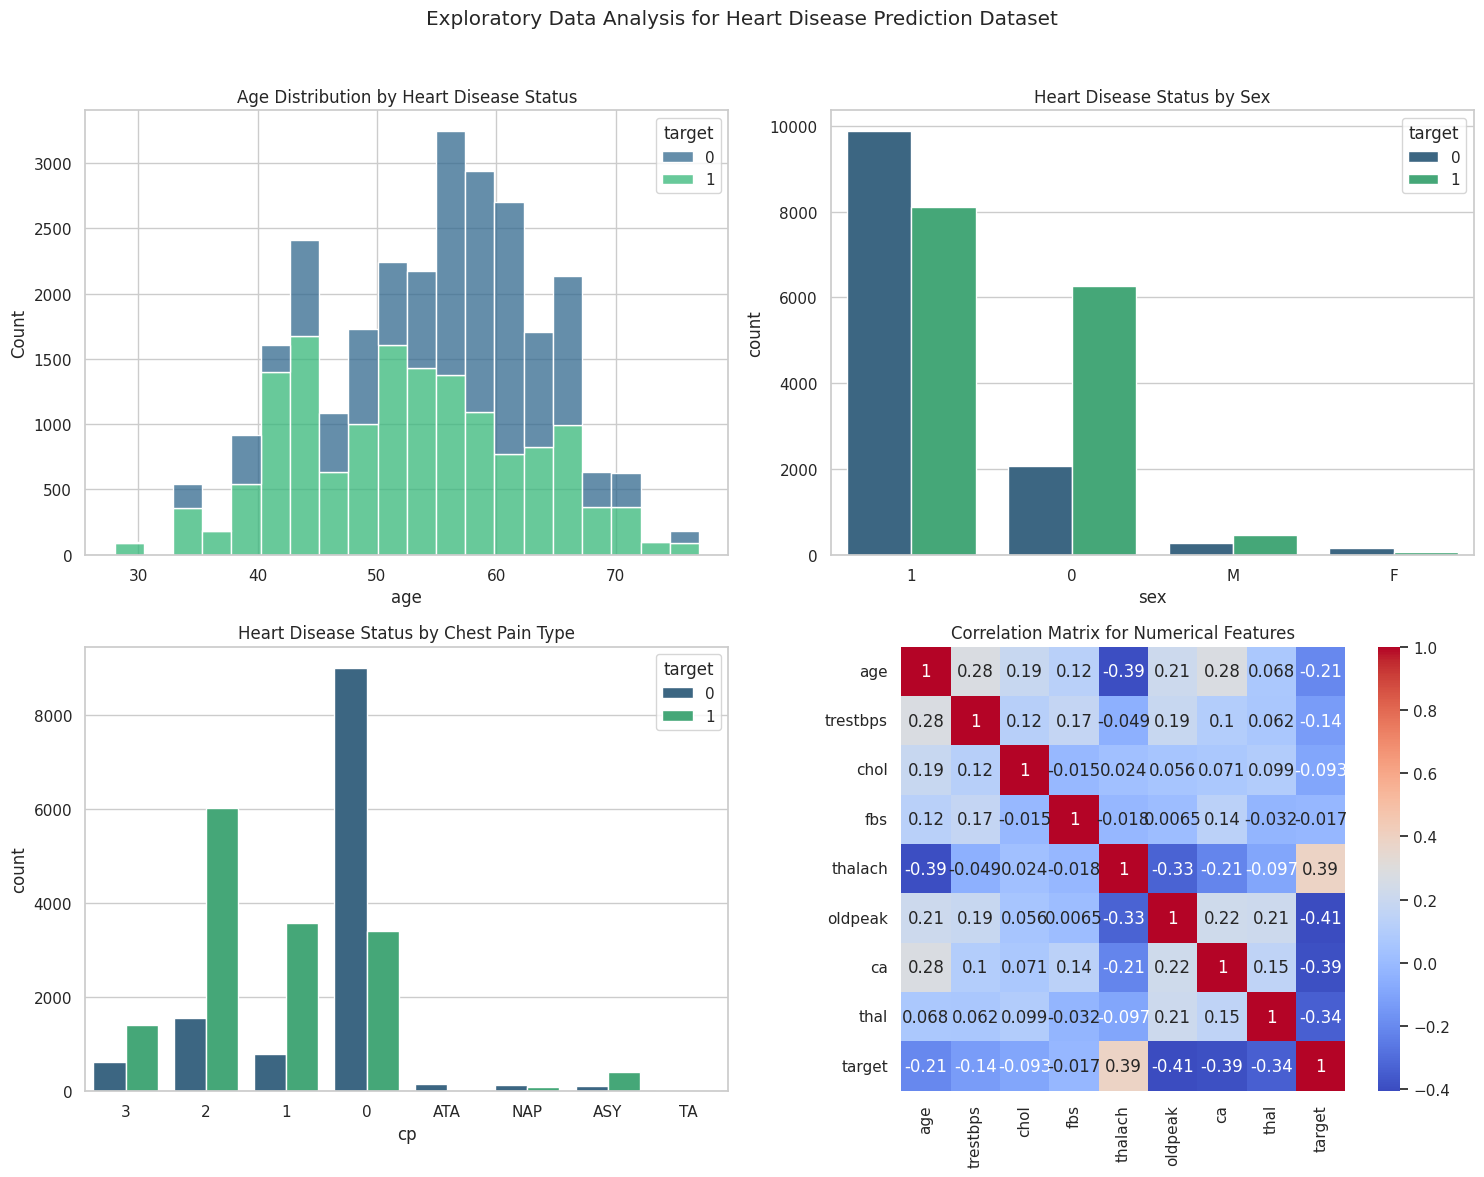

In [17]:
# Load the uploaded dataset
file_path = './src/Data/Merged/merged.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary info
data.head(), data.info()

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Adjust the plot to avoid issues with mismatched tick labels
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Exploratory Data Analysis for Heart Disease Prediction Dataset")

# Plot 1: Distribution of 'age' and 'target' (presence of heart disease)
sns.histplot(data, x='age', hue='target', multiple='stack', bins=20, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution by Heart Disease Status")

# Plot 2: Heart disease prevalence by sex
sns.countplot(data=data, x='sex', hue='target', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title("Heart Disease Status by Sex")

# Plot 3: Heart disease prevalence by chest pain type
sns.countplot(data=data, x='cp', hue='target', palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title("Heart Disease Status by Chest Pain Type")

# Plot 4: Correlation heatmap for numerical features
corr_matrix = data[['age', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal', 'target']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, ax=axes[1, 1])
axes[1, 1].set_title("Correlation Matrix for Numerical Features")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Hypothesis Testing

In [18]:
try:
    hypothesis_tests = HypothesisTests(logger=logger)
    response = hypothesis_tests.load_data(file=file)
    response = hypothesis_tests.run_all_tests()
    
    if response["success"]:
        validate_hypothesis_tests = ValidateHypothesisTesting(logger=logger, hypothesis_tests=hypothesis_tests)
        response = validate_hypothesis_tests.run_all_tests()
except Exception as e:
    logger.error(f"An unexpected error occured: Error: {e}")
    logger.error(traceback.print_exc())

INFO:src.Helper.dataloader:[HypothesisTests] Data loaded successfully from /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Data/Processed/selected_features.csv
2024-12-13 12:05:41,369 - __main__ - INFO - [HypothesisTests] Running Hypothesis Tests...
2024-12-13 12:05:41,372 - __main__ - INFO - [HypothesisTests] Age and Heart Disease Test
2024-12-13 12:05:41,372 - __main__ - INFO - [HypothesisTests] Null Hypothesis: There is no significant difference in the mean age between individuals with heart disease and those without.
2024-12-13 12:05:41,372 - __main__ - INFO - [HypothesisTests] Alternative Hypothesis: There is a significant difference in the mean age between individuals with heart disease and those without.
2024-12-13 12:05:41,373 - __main__ - INFO - [HypothesisTests] p-value = 0.0000
2024-12-13 12:05:41,373 - __main__ - INFO - [HypothesisTests] Result: Reject the null hypothesis (p < 0.05)
2024-12-13 12:05:41,376 - __main__ - INFO - [HypothesisTests] Ch

# Machine Learning Model - Random Forest Classifier

## Training & Testing Data

In [19]:
# Load dataset
input_file = os.path.join(BASE_DIR, "src/Data/Merged/merged.csv")

if not os.path.exists(input_file):
    raise FileNotFoundError(f"Input file {input_file} does not exist.")

logger.info(f"Loading dataset from {input_file}")
data = pd.read_csv(input_file)

# Features and target
logger.info("Splitting features and target.")
X = data.drop(columns=['target'])
y = data['target']

# Train-test split
logger.info("Splitting data into training and testing sets.")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Combine training features and target for saving
train_data_file = os.path.join(BASE_DIR, "src/Data/Training/data.csv")
train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
train_data.to_csv(train_data_file, index=False)
logger.info(f"Training data saved to {train_data_file}.")

# Combine testing features and target for saving
test_data_file = os.path.join(BASE_DIR, "src/Data/Testing/data.csv")
test_data = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)
test_data.to_csv(test_data_file, index=False)
logger.info(f"Testing data saved to {test_data_file}.")

2024-12-13 12:05:41,416 - __main__ - INFO - Loading dataset from /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Data/Merged/merged.csv
2024-12-13 12:05:41,431 - __main__ - INFO - Splitting features and target.
2024-12-13 12:05:41,433 - __main__ - INFO - Splitting data into training and testing sets.
2024-12-13 12:05:41,525 - __main__ - INFO - Training data saved to /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Data/Training/data.csv.
2024-12-13 12:05:41,572 - __main__ - INFO - Testing data saved to /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Data/Testing/data.csv.


## Initial Testing

In [20]:
# Using RandomForestClassifier
initial_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [21]:
response = TestModel(
    logger = logger, 
    file = test_data_file,
    model = initial_model
)

if response["success"]:
    initial_results = response["data"]
else:
    AnErrorOccured(
        message = "Unable to Test model...", 
        response = response, 
        logger = logger
    )

2024-12-13 12:05:41,596 - __main__ - INFO - [TestModel] Starting model testing process.
2024-12-13 12:05:41,597 - __main__ - WARNING - [TestModel] Model is untrained. Train the model first.
2024-12-13 12:05:41,604 - __main__ - INFO - [TestModel] Sample data loaded successfully.
2024-12-13 12:05:41,678 - __main__ - INFO - [TestModel] Model trained on sample data successfully.
2024-12-13 12:05:41,679 - __main__ - INFO - [TestModel] Model and path validation completed.
2024-12-13 12:05:41,679 - __main__ - INFO - [TestModel] Data loading initiated.
2024-12-13 12:05:41,686 - __main__ - INFO - [Testing] Data loaded successfully from /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Data/Testing/data.csv
2024-12-13 12:05:41,687 - __main__ - INFO - [TestModel] Data loading completed.
2024-12-13 12:05:41,687 - __main__ - INFO - [test_model] Starting model testing.
2024-12-13 12:05:41,691 - __main__ - INFO - [test_model] Model training completed.
2024-12-13 12:05:41,865

## Scaling Data

In [22]:
scaler = Scale(logger)
scaler.load_data(file=train_data_file)
response = scaler.scale_data()
scaled_data_file = os.path.join(BASE_DIR, "src/Data/Scaled/data.csv")

if response["success"]:
    # Perform Mini-batch Gradient Descent
    gradient_response = scaler.mini_batch_gradient_descent(batch_size=32, learning_rate=0.01, epochs=100)
    
    if gradient_response["success"]:
        logger.info(f"Trained weights: {gradient_response['weights']}")
        logger.info(f"Trained bias: {gradient_response['bias']}")
        scaler.save_file(scaled_data_file)
    else:
        AnErrorOccured(
            message = "message", 
            response = response, 
            logger = logger
        )

2024-12-13 12:05:41,895 - __main__ - INFO - [Scaling] Data loaded successfully from /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Data/Training/data.csv
2024-12-13 12:05:41,898 - __main__ - INFO - Data scaling completed: mean and std calculated.
2024-12-13 12:05:41,905 - __main__ - INFO - Epoch 0/100 - Loss: nan
2024-12-13 12:05:41,953 - __main__ - INFO - Epoch 10/100 - Loss: nan
2024-12-13 12:05:42,003 - __main__ - INFO - Epoch 20/100 - Loss: nan
2024-12-13 12:05:42,051 - __main__ - INFO - Epoch 30/100 - Loss: nan
2024-12-13 12:05:42,101 - __main__ - INFO - Epoch 40/100 - Loss: nan
2024-12-13 12:05:42,149 - __main__ - INFO - Epoch 50/100 - Loss: nan
2024-12-13 12:05:42,199 - __main__ - INFO - Epoch 60/100 - Loss: nan
2024-12-13 12:05:42,247 - __main__ - INFO - Epoch 70/100 - Loss: nan
2024-12-13 12:05:42,297 - __main__ - INFO - Epoch 80/100 - Loss: nan
2024-12-13 12:05:42,347 - __main__ - INFO - Epoch 90/100 - Loss: nan
2024-12-13 12:05:42,392 - __main__ 

## Model Trainig

In [23]:
response = TrainModel(
    logger = logger,
    file = scaled_data_file,
    model = initial_model
)

if response["success"]:
    trained_model = response["data"]["model"]
else:
    AnErrorOccured(
        message = "Unable to Train model...",  
        response = response, 
        logger = logger
    )

2024-12-13 12:05:42,493 - __main__ - INFO - [TrainModel] Starting model testing process.
2024-12-13 12:05:42,493 - __main__ - INFO - [TestModel] Model and path validation completed.
2024-12-13 12:05:42,508 - __main__ - INFO - [Training] Data loaded successfully from /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Data/Scaled/data.csv
2024-12-13 12:05:42,509 - __main__ - INFO - [Training] Encoding non-numeric column: sex
2024-12-13 12:05:42,511 - __main__ - INFO - [Training] Encoding non-numeric column: cp
2024-12-13 12:05:42,512 - __main__ - INFO - [Training] Encoding non-numeric column: restecg
2024-12-13 12:05:42,514 - __main__ - INFO - [Training] Encoding non-numeric column: exang
2024-12-13 12:05:42,515 - __main__ - INFO - [Training] Encoding non-numeric column: slope
2024-12-13 12:05:42,518 - __main__ - WARNING - [Training] Missing values detected in the target column. Dropping rows with NaN in the target.
2024-12-13 12:05:42,521 - __main__ - INFO - [Tr

## Model Testing After Trainig on Scaled Data

In [24]:
response = TestModel(
    logger = logger, 
    file = test_data_file,
    model = trained_model
)

if response["success"]:
    final_results = response["data"]
else:
    AnErrorOccured(
        message = "Unable to Test model...", 
        response = response, 
        logger = logger
    )

2024-12-13 12:05:43,210 - __main__ - INFO - [TestModel] Starting model testing process.
2024-12-13 12:05:43,211 - __main__ - INFO - [TestModel] Model and path validation completed.
2024-12-13 12:05:43,211 - __main__ - INFO - [TestModel] Data loading initiated.
2024-12-13 12:05:43,219 - __main__ - INFO - [Testing] Data loaded successfully from /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Data/Testing/data.csv
2024-12-13 12:05:43,220 - __main__ - INFO - [TestModel] Data loading completed.
2024-12-13 12:05:43,220 - __main__ - INFO - [test_model] Starting model testing.
2024-12-13 12:05:43,225 - __main__ - INFO - [test_model] Model training completed.
2024-12-13 12:05:43,397 - __main__ - INFO - [TestModel] Model testing completed successfully.
2024-12-13 12:05:43,398 - __main__ - INFO - Testing completed successfully
2024-12-13 12:05:43,398 - __main__ - INFO - Accuracy: 51.0671%
2024-12-13 12:05:43,398 - __main__ - INFO - Prediction Time: 0.0115 seconds


## Analysis

In [25]:
# Identify feature types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# During training
X_train_processed, preprocessor = preprocess_data(
    X_train, 
    categorical_features, 
    numeric_features
)

response = CompareModelPerformance(
    logger = logger,
    models = {
        "Initial Model": initial_model,
        "Trained Model": trained_model
    },
    file = test_data_file,
    X_test = X_test,
    y_test = y_test,
    preprocessor=preprocessor,
    graph_dir = os.path.join(BASE_DIR, "src/Graphs/ModelsAnalysis/")
)

if response["success"]:
    results = response["data"]
    # Detailed Analysis
    logger.info("Detailed Analysis:")
    logger.info(f"Accuracy improvement: {float(final_results['Accuracy']) - float(initial_results['Accuracy']):.4f}%")
    logger.info(f"Prediction Time change: {float(final_results['Prediction Time']) - float(initial_results['Prediction Time']):.4f} seconds")
else:
    AnErrorOccured(
        message = "Unable to Compare models...", 
        response = response, 
        logger = logger
    )

2024-12-13 12:05:43,446 - __main__ - INFO - Loading test data from file: /mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[2922] Data Processing/src/Data/Testing/data.csv
2024-12-13 12:05:43,458 - __main__ - INFO - Test data before preprocessing:     age sex cp  trestbps   chol  fbs restecg  thalach exang  oldpeak slope  \
0  52.0   0  2     136.0  196.0  0.0       0    169.0     0      0.1     1   
1  67.0   1  0     120.0  237.0  0.0       1     71.0     0      1.0     1   
2  39.0   1  2     140.0  321.0  0.0       0    182.0     0      0.0     2   
3  54.0   1  2     125.0  273.0  0.0       0    152.0     0      0.5     0   
4  42.0   1  0     140.0  226.0  0.0       1    178.0     0      0.0     2   

    ca  thal  
0  0.0   2.0  
1  0.0   2.0  
2  0.0   2.0  
3  1.0   2.0  
4  0.0   2.0  
/mnt/Drives/Seagate_8TB/Vignesh Goswami/Projects/[0012] Editor/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 